In [1]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [2]:
url = "https://raw.githubusercontent.com/PacktPublishing/TensorFlow-Developer-Certificate-Guide/main/Chapter%2012/sales_data.csv"
df = pd.read_csv(url)

In [3]:

data = df['Sales']

In [4]:
window_size=20
batch_size = 32
buffer_size = 1000
x= []
y= []

In [5]:
for i in range(window_size, len(data)):
  x.append(data[i-window_size:i])
  y.append(data[i])

In [6]:
x = np.array(x)
y = np.array(y)

In [7]:
split = int(0.8 * len(x))
x_train, x_val = x[:split], x[split:]
y_train, y_val = y[:split], y[split:]

In [8]:
x_train = x_train.reshape(-1, window_size, 1)
x_val = x_val.reshape(-1, window_size, 1)

In [20]:
train_data = tf.data.Dataset.from_tensor_slices(
    (x_train, y_train))
train_data = train_data.shuffle(buffer_size).batch(batch_size)

In [21]:
def window_dataset(series):
  dataset = tf.data.Dataset.from_tensor_slices(series)
  dataset = dataset.window(window_size+1, shift=1, drop_remainder=True)
  dataset = dataset.flat_map(lambda window: window.batch(window_size+1))
  dataset = dataset.map(lambda window:(window[:-1], window[-1]))
  dataset = dataset.shuffle(buffer_size)
  dataset = dataset.batch(batch_size).prefetch(1)
  return dataset

In [26]:
model = tf.keras.models.Sequential(
  [tf.keras.layers.Conv1D(filters=32, kernel_size=3,strides=1,padding='causal',activation='relu',input_shape=(window_size, 1)),
   tf.keras.layers.MaxPooling1D(pool_size=2),
   tf.keras.layers.Conv1D(filters=64, kernel_size=3,strides=1,padding='causal',activation='relu'),
   tf.keras.layers.MaxPooling1D(pool_size=2),
   tf.keras.layers.Flatten(),
   tf.keras.layers.Dense(50, activation='relu'),
   tf.keras.layers.Dense(10, activation='relu'),
   tf.keras.layers.Dense(1)]
)

In [27]:
model.compile(loss='mse', optimizer='adam')
model.fit(train_data, epochs=100)

Epoch 1/100
91/91 [==============================] - 1s 2ms/step - loss: 172.6898
Epoch 2/100
91/91 [==============================] - 0s 2ms/step - loss: 53.6977
Epoch 3/100
91/91 [==============================] - 0s 2ms/step - loss: 55.2233
Epoch 4/100
91/91 [==============================] - 0s 2ms/step - loss: 52.1400
Epoch 5/100
91/91 [==============================] - 0s 2ms/step - loss: 50.2436
Epoch 6/100
91/91 [==============================] - 0s 2ms/step - loss: 51.1210
Epoch 7/100
91/91 [==============================] - 0s 2ms/step - loss: 49.9269
Epoch 8/100
91/91 [==============================] - 0s 2ms/step - loss: 47.9173
Epoch 9/100
91/91 [==============================] - 0s 2ms/step - loss: 49.2615
Epoch 10/100
91/91 [==============================] - 0s 2ms/step - loss: 50.8401
Epoch 11/100
91/91 [==============================] - 0s 2ms/step - loss: 48.7338
Epoch 12/100
91/91 [==============================] - 0s 2ms/step - loss: 47.0389
Epoch 13/100
91/91 [====

In [28]:
def evaluate_model(model, x_val, y_val):
  forecast_val = model.predict(x_val)
  mae_val = tf.keras.metrics.mean_absolute_error(y_val, forecast_val)
  mse_val = tf.keras.mean_squared_error(y_val, forecast_val)
  return mae_val, mse_val

In [29]:
def plot_prediction(forecast_val, y_val, title="model plot", start_date=None, end_date=None ):
  plt.figure(figsize=(10,6))
  plt.plot(forecast_val, label="Predicted")
  plt.plot(y_val, label="Actual")
  if start_date and end_date:
     start_idx = df.index.get_loc(pd.Timestamp(start_date))
     end_idx = df.index.get_loc(pd.Timestamp(end_date))
     start_idx -= len(data) - len(y_val)
     end_idx -= len(data) - len(y_val)
     plt.xlim(start_idx, end_idx)
  plt.title(title)
  plt.legend()
  plt.show()

23/23 [==============================] - 0s 1ms/step


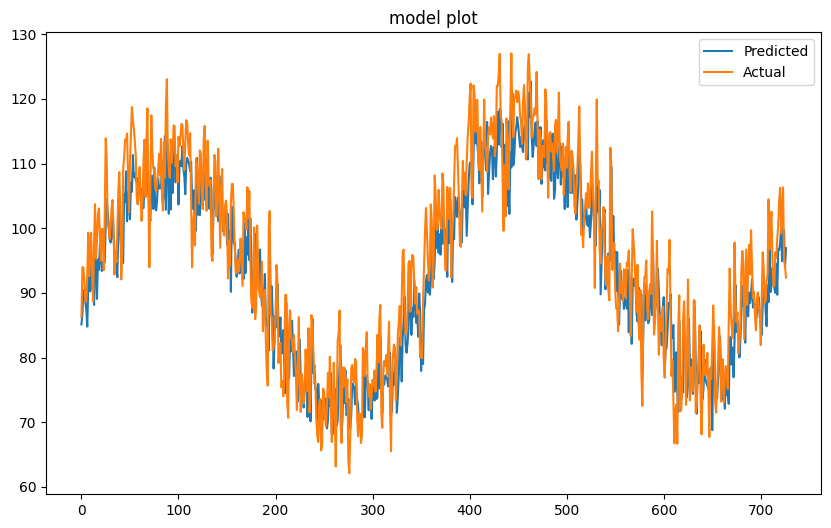

In [32]:
forecast_val = model.predict(x_val)
plot_prediction(forecast_val, y_val)

